## Title: Pandas Assignment

#### Name: Ayesha

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Problem 01: “Advanced Pandas Data Manipulation with Kaggle Housing Dataset”

In [2]:
df=pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
median=df['price'].median()

In [5]:
house_filtered=df[(df['price']>median) & 
                  (df['bedrooms']>2) & 
                  (df['area']>2000)]
house_filtered

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,4403000,2880,3,1,2,yes,no,no,no,no,0,yes,semi-furnished
266,4403000,4880,3,1,1,yes,no,no,no,no,2,yes,unfurnished
267,4403000,4920,3,1,2,yes,no,no,no,no,1,no,semi-furnished
268,4382000,4950,4,1,2,yes,no,no,no,yes,0,no,semi-furnished


In [9]:
group_houses=house_filtered.groupby('bedrooms').agg(average_price=('price','mean'),
                                                    median_living_area=('area','median')).reset_index()

In [10]:
group_houses

,bedrooms,average_price,median_living_area
0,3,6.084991e+06,6000.0
1,4,6.776328e+06,6000.0
2,5,7.379167e+06,7395.0
3,6,6.083000e+06,4300.0


In [12]:
top_5=house_filtered[house_filtered['price']>house_filtered['price'].quantile(0.95)]
top_5

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [14]:
correlation=df[['price','area','bedrooms']].corr()
correlation

,price,area,bedrooms
price,1.000000,0.535997,0.366494
area,0.535997,1.000000,0.151858
bedrooms,0.366494,0.151858,1.000000


In [16]:
stat_description=df[['price','bedrooms','area','parking']].describe()
stat_description

,price,bedrooms,area,parking
count,5.450000e+02,545.000000,545.000000,545.000000
mean,4.766729e+06,2.965138,5150.541284,0.693578
std,1.870440e+06,0.738064,2170.141023,0.861586
min,1.750000e+06,1.000000,1650.000000,0.000000
25%,3.430000e+06,2.000000,3600.000000,0.000000
50%,4.340000e+06,3.000000,4600.000000,0.000000
75%,5.740000e+06,3.000000,6360.000000,1.000000
max,1.330000e+07,6.000000,16200.000000,3.000000


In [22]:
price_per_sqft=df['price']/df['area']
def classify_price_per_sqft(row):
    if row['price_per_sqft']<100:
        return'Low'
    elif row['price_per_sqft']<200:
        return'Medium'
    else:
        return'High'


In [23]:
price_per_sqft

0      1792.452830
1      1367.187500
2      1229.919679
3      1628.666667
4      1537.735849
          ...     
540     606.666667
541     736.312500
542     483.425414
543     601.374570
544     454.545455
Length: 545, dtype: float64

In [115]:
price_category= df.apply(classify_price_per_sqft, axis=1)
price_category

0      High
1      High
2      High
3      High
4      High
       ... 
540    High
541    High
542    High
543    High
544    High
Length: 545, dtype: object

In [27]:
df['bathrooms'].fillna(df['bathrooms'].mean(), inplace=True)
df['area'].fillna(df['area'].mean(), inplace=True)
df['price'].fillna(df['price'].mean(), inplace=True)

In [28]:
missing_values=df[['bathrooms', 'area', 'price']].isnull().sum()
missing_values

bathrooms    0
area         0
price        0
dtype: int64

##### Problem 02: “Student Performance Analysis”

In [30]:
data={
    'student_id': range(1, 101),
    'grades': np.random.randint(50, 100, 100),
    'attendance': np.random.randint(70, 100, 100),
    'extracurricular_activity': np.random.choice(['Sports', 'Music', 'Art'], 100)
}

In [32]:
students=pd.DataFrame(data)
students

,student_id,grades,attendance,extracurricular_activity
0,1,97,94,Sports
1,2,78,78,Music
2,3,74,72,Art
3,4,71,76,Music
4,5,80,71,Art
...,...,...,...,...
95,96,90,81,Art
96,97,93,83,Sports
97,98,98,74,Sports
98,99,75,71,Art


In [34]:
filter_students=students[(students['grades']>85) & (students['attendance']>=90)]
filter_students

,student_id,grades,attendance,extracurricular_activity
0,1,97,94,Sports
12,13,94,96,Art
13,14,88,91,Art
28,29,87,95,Sports
31,32,93,94,Sports
47,48,97,97,Art
65,66,92,98,Music
75,76,98,90,Music
86,87,98,99,Art
99,100,90,95,Music


In [35]:
activity_group=students.groupby('extracurricular_activity').agg(
    average_grades=('grades', 'mean'),
    total_attendance=('attendance', 'sum')
).reset_index()
activity_group

,extracurricular_activity,average_grades,total_attendance
0,Art,75.612903,2587
1,Music,73.393939,2834
2,Sports,75.611111,3043


In [37]:

highest_activity=activity_group.loc[activity_group['average_grades'].idxmax()]
highest_activity

extracurricular_activity          Art
average_grades              75.612903
total_attendance                 2587
Name: 0, dtype: object

In [39]:
students['pass_fail']=students['grades'].apply(lambda x: 'Pass' if x >= 60 else 'Fail')
pass_fail_counts=students['pass_fail'].value_counts()
pass_fail_counts

pass_fail
Pass    76
Fail    24
Name: count, dtype: int64

In [41]:
income_data={
    'student_id': range(1, 101),
    'parent_income': np.random.choice(['Low', 'Medium', 'High'], 100)
     }
income=pd.DataFrame(income_data)
income

,student_id,parent_income
0,1,Low
1,2,Medium
2,3,High
3,4,Medium
4,5,Medium
...,...,...
95,96,Low
96,97,Medium
97,98,High
98,99,Medium


In [42]:
merged_df=pd.merge(students,income, on='student_id')
merged_df

,student_id,grades,attendance,extracurricular_activity,pass_fail,parent_income
0,1,97,94,Sports,Pass,Low
1,2,78,78,Music,Pass,Medium
2,3,74,72,Art,Pass,High
3,4,71,76,Music,Pass,Medium
4,5,80,71,Art,Pass,Medium
...,...,...,...,...,...,...
95,96,90,81,Art,Pass,Low
96,97,93,83,Sports,Pass,Medium
97,98,98,74,Sports,Pass,High
98,99,75,71,Art,Pass,Medium


In [43]:
income_analysis=merged_df.groupby('parent_income')['grades'].mean()
income_analysis

parent_income
High      75.806452
Low       73.371429
Medium    75.588235
Name: grades, dtype: float64

In [44]:
merged_df['quartile'] = pd.qcut(merged_df['grades'], 4)

In [45]:

quartile_analysis = merged_df.groupby('quartile').agg(
    average_attendance=('attendance', 'mean')
)
quartile_analysis

C:\Users\DNS\AppData\Local\Temp\ipykernel_6616\748268036.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_analysis = merged_df.groupby('quartile').agg(


,average_attendance
quartile,
"(49.999, 61.5]",84.560000
"(61.5, 75.0]",83.923077
"(75.0, 88.0]",84.500000
"(88.0, 98.0]",85.695652


In [46]:
merged_df['performance_score'] = (merged_df['grades'] * 0.5 + 
                                   merged_df['attendance'] * 0.3 + 
                                   (merged_df['pass_fail'] == 'Pass') * 20)


In [47]:
merged_df

,student_id,grades,attendance,extracurricular_activity,pass_fail,parent_income,quartile,performance_score
0,1,97,94,Sports,Pass,Low,"(88.0, 98.0]",96.7
1,2,78,78,Music,Pass,Medium,"(75.0, 88.0]",82.4
2,3,74,72,Art,Pass,High,"(61.5, 75.0]",78.6
3,4,71,76,Music,Pass,Medium,"(61.5, 75.0]",78.3
4,5,80,71,Art,Pass,Medium,"(75.0, 88.0]",81.3
...,...,...,...,...,...,...,...,...
95,96,90,81,Art,Pass,Low,"(88.0, 98.0]",89.3
96,97,93,83,Sports,Pass,Medium,"(88.0, 98.0]",91.4
97,98,98,74,Sports,Pass,High,"(88.0, 98.0]",91.2
98,99,75,71,Art,Pass,Medium,"(61.5, 75.0]",78.8


##### Problem 03: “Movie Ratings and Trends Analysis”

In [104]:
movies=pd.read_csv('movies_metadata.csv')
movies.head()

C:\Users\DNS\AppData\Local\Temp\ipykernel_6616\2323285568.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies=pd.read_csv('movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [105]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [106]:
movies.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [107]:
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
movies['release_year'] = movies['release_date'].dt.year


In [108]:
movies_filtered = movies[(movies['release_year'] > 2000) & (movies['vote_count'] >= 100)]
print(movies_filtered[['title', 'release_year', 'vote_count']].head())

                    title  release_year  vote_count
3926            Antitrust        2001.0       156.0
3928  Save the Last Dance        2001.0       359.0
3930           The Pledge        2001.0       221.0
3943  The Wedding Planner        2001.0       433.0
4017            Valentine        2001.0       114.0


In [110]:
movies_filtered['classification'] = movies_filtered['revenue'].apply(lambda x: 'Blockbuster' if x > 100_000_000 else 'Flop')
movies_filtered

C:\Users\DNS\AppData\Local\Temp\ipykernel_6616\212862556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_filtered['classification'] = movies_filtered['revenue'].apply(lambda x: 'Blockbuster' if x > 100_000_000 else 'Flop')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,release_year,classification
3926,False,NaN,30000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.antitrustthemovie.com/,9989,tt0218817,en,Antitrust,A computer programmer's dream job at a hot Por...,...,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Truth can be dangerous...Trust can be deadly.,Antitrust,False,5.8,156.0,2001.0,Flop
3928,False,"{'id': 107469, 'name': 'Save The Last Dance Co...",13000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",NaN,9816,tt0206275,en,Save the Last Dance,"A white midwestern girl moves to Chicago, wher...",...,112.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Only Person You Need To Be Is Yourself.,Save the Last Dance,False,6.3,359.0,2001.0,Flop
3930,False,NaN,35000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://movies.warnerbros.com/thepledge/,5955,tt0237572,en,The Pledge,A police chief about to retire pledges to help...,...,123.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Pledge,False,6.6,221.0,2001.0,Flop
3943,False,NaN,35000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,2018,tt0209475,en,The Wedding Planner,"Mary Fiore, San Francisco's premiere wedding p...",...,103.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,His big day is her big problem.,The Wedding Planner,False,5.4,433.0,2001.0,Flop
4017,False,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",NaN,10984,tt0242998,en,Valentine,Five friends are stalked and murdered by a mas...,...,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Remember that kid everyone ignored on Valentin...,Valentine,False,5.0,114.0,2001.0,Flop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45265,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,265189,tt2121382,sv,Turist,"While holidaying in the French Alps, a Swedish...",...,118.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,Force Majeure,False,6.8,255.0,2014.0,Flop
45268,False,NaN,5402000,"[{'id': 35, 'name': 'Comedy'}]",NaN,277839,tt4531694,fr,Pattaya,Franky and Krimo dream of leaving the grey gri...,...,100.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,"Good Guys Go to Heaven, Bad Guys Go to Pattaya",False,5.3,153.0,2016.0,Flop
45343,False,"{'id': 52888, 'name': 'The Visitors Collection...",25868826,"[{'id': 35, 'name': 'Comedy'}]",NaN,248705,tt2441982,fr,Les Visiteurs: La Révolution,"Stuck in the corridors of time, Godefroy de Mo...",...,110.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,The Visitors: Bastille Day,False,4.0,167.0,2016.0,Flop
45437,False,NaN,0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",NaN,455661,tt6969946,en,In a Heartbeat,A closeted boy runs the risk of being outed by...,...,4.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Heart Wants What The Heart Wants,In a Heartbeat,False,8.3,146.0,2017.0,Flop


In [111]:
movies_filtered['genres'] = movies_filtered['genres'].str.split('|')
movies_exploded = movies_filtered.explode('genres')


C:\Users\DNS\AppData\Local\Temp\ipykernel_6616\1299445113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_filtered['genres'] = movies_filtered['genres'].str.split('|')


In [112]:
genre_stats = movies_exploded.groupby('genres').agg({'vote_average': 'mean', 'revenue': 'sum'}).reset_index()
genre_stats.columns = ['Genre', 'Average Rating', 'Total Earnings']
genre_stats

,Genre,Average Rating,Total Earnings
0,[],5.950000,119114517.0
1,"[{'id': 10402, 'name': 'Music'}, {'id': 12, 'n...",6.600000,50907422.0
2,"[{'id': 10402, 'name': 'Music'}, {'id': 16, 'n...",6.200000,13603453.0
3,"[{'id': 10402, 'name': 'Music'}, {'id': 18, 'n...",6.700000,114194847.0
4,"[{'id': 10402, 'name': 'Music'}, {'id': 18, 'n...",6.400000,306154960.0
...,...,...,...
1047,"[{'id': 99, 'name': 'Documentary'}, {'id': 28,...",7.600000,13885802.0
1048,"[{'id': 99, 'name': 'Documentary'}, {'id': 35,...",6.600000,28575078.0
1049,"[{'id': 99, 'name': 'Documentary'}, {'id': 35,...",6.100000,64282312.0
1050,"[{'id': 99, 'name': 'Documentary'}, {'id': 36,...",7.000000,0.0


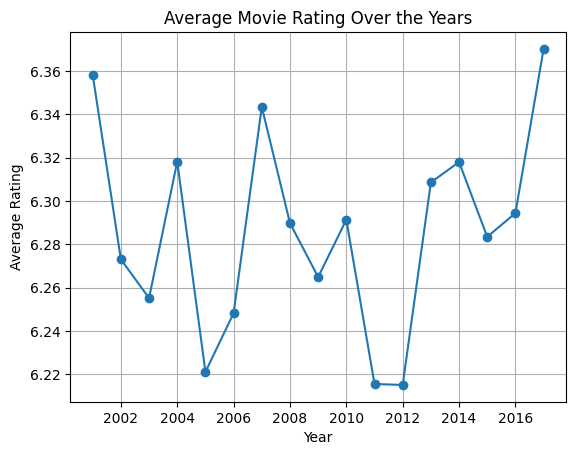

In [114]:
average_rating_per_year = movies_filtered.groupby('release_year')['vote_average'].mean().reset_index()
plt.plot(average_rating_per_year['release_year'], average_rating_per_year['vote_average'], marker='o')
plt.title('Average Movie Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid()
plt.show()

##### Problem 04: “Data Detective”

In [116]:
crime=pd.read_csv('US_Crime_DataSet.csv')
crime.head()

C:\Users\DNS\AppData\Local\Temp\ipykernel_6616\4092999217.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  crime=pd.read_csv('US_Crime_DataSet.csv')


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [68]:
crime.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [69]:
crime.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

In [81]:
evidence_data = {
    'Record ID': [1, 2, 3, 4, 5], 
    'Evidence Type': ['Fingerprint', 'DNA', 'Weapon', 'Witness Testimony', 'Surveillance Video']
}
evidence_df = pd.DataFrame(evidence_data)
evidence_df

,Record ID,Evidence Type
0,1,Fingerprint
1,2,DNA
2,3,Weapon
3,4,Witness Testimony
4,5,Surveillance Video


In [82]:
crime['suspicion_level'] = crime['Crime Type'].apply(lambda x: 4 if x in ['Murder or Manslaughter', 'Assault', 'Homicide'] else 2)

In [83]:
suspects = crime[crime['suspicion_level'] > 3]
print("Suspects with a suspicion level above 3:")
suspects

Suspects with a suspicion level above 3:


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source,suspicion_level
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI,4
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI,4
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI,4
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI,4
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,...,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI,4
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI,4
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI,4
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI,4


In [84]:
suspects_merged_df = pd.merge(suspects, evidence_df, on='Record ID', how='inner')
suspects_merged_df

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source,suspicion_level,Evidence Type
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI,4,Fingerprint
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI,4,DNA
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI,4,Weapon
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI,4,Witness Testimony
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI,4,Surveillance Video


In [85]:
grouped_suspects = suspects.groupby('suspicion_level').size().reset_index(name='Count')
grouped_suspects

,suspicion_level,Count
0,4,629338


In [86]:
average_suspicion = suspects['suspicion_level'].mean()
print(f"\nAverage suspicion level: {average_suspicion}")


Average suspicion level: 4.0


##### Problem 05: “Advanced Data Analysis with Pandas”

In [87]:
titanic=pd.read_csv('Titanic-Dataset.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
grouped = titanic.groupby('Pclass').agg(
    mean_age=('Age', 'mean'),
    count=('Age', 'count'),
    mean_fare=('Fare', 'mean')
).reset_index()
grouped


,Pclass,mean_age,count,mean_fare
0,1,38.233441,186,84.154687
1,2,29.877630,173,20.662183
2,3,25.140620,355,13.675550


In [89]:
pivot_table = titanic.pivot_table(
    index='Sex',
    columns='Pclass',
    values='Survived',
    aggfunc='mean'
)
pivot_table


Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [91]:
titles_data={
    'Name': ['Allen, Miss. Elisabeth Walton', 'Bonnell, Miss. Elizabeth', 'Cummings, Mr. John', 'Heikkinen, Miss. Laina'],
    'Title': ['Miss', 'Miss', 'Mr', 'Miss']
}
titles_df=pd.DataFrame(titles_data)
titles_df

,Name,Title
0,"Allen, Miss. Elisabeth Walton",Miss
1,"Bonnell, Miss. Elizabeth",Miss
2,"Cummings, Mr. John",Mr
3,"Heikkinen, Miss. Laina",Miss


In [92]:
merged_data = pd.merge(titanic, titles_df, left_on='Name', right_on='Name', how='left')
print(merged_data[['Name', 'Title', 'Survived']].head())
merged_data

                                                Name Title  Survived
0                            Braund, Mr. Owen Harris   NaN         0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   NaN         1
2                             Heikkinen, Miss. Laina  Miss         1
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   NaN         1
4                           Allen, Mr. William Henry   NaN         0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,NaN


In [93]:
def age_category(age):
    if age < 18:
        return 'Child'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'
titanic['Age_Category'] = titanic['Age'].apply(age_category)
titanic[['Age', 'Age_Category']].head()


,Age,Age_Category
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult
